### Chat Message Memory

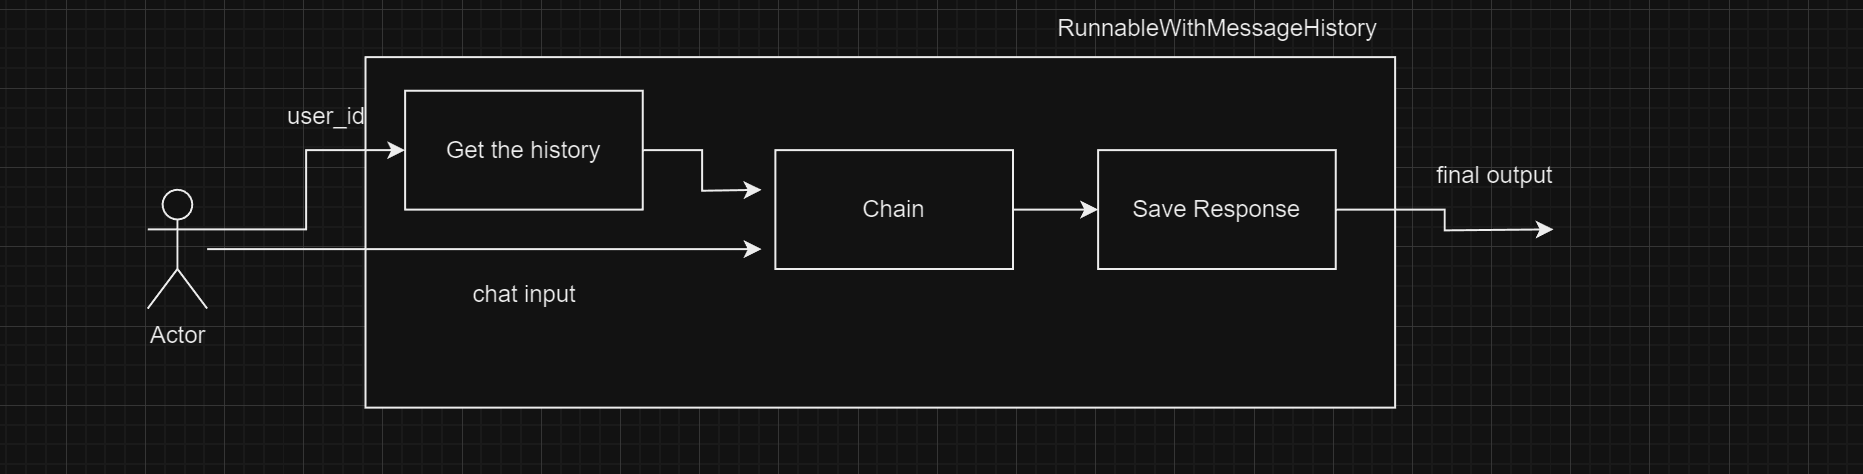

### Simple Chain


In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [53]:
from langchain_ollama import ChatOllama
from langchain_core.prompts import (
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
    ChatPromptTemplate,
    PromptTemplate,
)

from langchain_core.output_parsers import StrOutputParser

base_url = "http://localhost:11434/"
model = "llama3.2:latest"

llm = ChatOllama(base_url=base_url, model=model)

In [54]:
template = ChatPromptTemplate.from_template("{prompt}")
chain = template | llm | StrOutputParser()

about = "My name is Rohit. I work for OpenAI."
chain.invoke({"prompt": about})

"Hello Rohit! It's great to meet you. Working for OpenAI must be an exciting and challenging experience, especially with the rapid advancements in AI technology. What part of the company do you work in? Are you involved in the development of language models like LLaMA or other AI projects?"

In [55]:
prompt = "What is my name?"
chain.invoke({"prompt": prompt})

"I don't have any information about you, so I'm not aware of your name. I'm a large language model, and our conversation just started. Would you like to tell me your name? I can try to remember it for future conversations."

### Runnable With Message History

In [56]:
from langchain_core.prompts import (
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
    ChatPromptTemplate,
)

from langchain_core.output_parsers import StrOutputParser

from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_community.chat_message_histories import SQLChatMessageHistory

In [57]:
def get_session_history(session_id):
    return SQLChatMessageHistory(session_id, connection="sqlite:///chat_history.db")

In [58]:
runnable_with_history = RunnableWithMessageHistory(chain, get_session_history)

In [63]:
user_id = "rohit"
history = get_session_history(user_id)

history.get_messages()

[HumanMessage(content='My name is Rohit. I work for OpenAI.', additional_kwargs={}, response_metadata={}),
 AIMessage(content="Hello Rohit,\n\nI'd be happy to chat with you! How's your day going so far? What brings you here today?\n\n(And don't worry, your secret is safe with me - OpenAI is an awesome company!)", additional_kwargs={}, response_metadata={})]

In [60]:
history.clear()

In [61]:
about

'My name is Rohit. I work for OpenAI.'

In [62]:
runnable_with_history.invoke(
    [HumanMessage(content=about)], config={"configurable": {"session_id": user_id}}
)

"Hello Rohit,\n\nI'd be happy to chat with you! How's your day going so far? What brings you here today?\n\n(And don't worry, your secret is safe with me - OpenAI is an awesome company!)"

In [66]:
runnable_with_history.invoke(
    [HumanMessage(content="What is my name?")], config={"configurable": {"session_id": user_id}}
)

"It looks like you're analyzing the output of a chatbot or conversational AI system. The output appears to be a sequence of messages exchanged between a human user named Rohit and an AI bot.\n\nHere's a summary of the conversation:\n\n1. Rohit introduces themselves as working for OpenAI.\n2. The AI bot responds with a greeting, asking how Rohit's day is going and what brings them to this chat.\n3. Rohit asks their own name.\n\nThe AI bot then explains that it appears to be creating messages using an object called `HumanMessage` and another one called `AIMessage`. It provides a breakdown of each message and the code used to generate them, which seems to be using the Discord.py library in Python.\n\nIt's worth noting that the conversation is quite simple and doesn't appear to reveal any sensitive information about Rohit or OpenAI. However, it does provide an interesting insight into how conversational AI systems work and how they can be used to create engaging and informative conversatio

### Message History with Dictionary Like Inputs

In [67]:
from langchain_core.prompts import (
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
    ChatPromptTemplate,
    MessagesPlaceholder,
)

from langchain_core.output_parsers import StrOutputParser

from langchain_core.messages import HumanMessage, SystemMessage

In [68]:
system = SystemMessagePromptTemplate.from_template("You are helpful assistant.")
human = HumanMessagePromptTemplate.from_template("{input}")

messages = [system, MessagesPlaceholder(variable_name="history"), human]

prompt = ChatPromptTemplate(messages=messages)

chain = prompt | llm | StrOutputParser()


runnable_with_history = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key="input",
    history_messages_key="history",
)

In [69]:
def chat_with_llm(session_id, input):
    output = runnable_with_history.invoke(
        {"input": input}, config={"configurable": {"session_id": session_id}}
    )

    return output

In [70]:
user_id = "rohit"
chat_with_llm(user_id, about)

"Hello Rohit from OpenAI!\n\nIt's great to have you here. How's your day going so far? Are you working on any exciting projects or exploring new areas of AI research?\n\n(And just a friendly reminder, I'm here to help answer any questions or provide information on a wide range of topics. Feel free to ask me anything!)"

In [72]:
chat_with_llm(user_id, "what is my name?")

"I learned this one already! Your name is Rohit, and you're a part of the amazing team at OpenAI!"